# Timeseries study with Ibovespa database from Yahoo Finance

In [1]:
import pandas as pd
from pandas_datareader import data as wb
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Set theme from Seaborn for graphics background
sns.set_theme(style="darkgrid")

In [3]:
# Data Minning from Yahoo Finance with start date 2010 until today
ibov = wb.DataReader("^BVSP", data_source="yahoo", start="2010-1-1")
ibov.shape

(2823, 6)

### Dataset info

In [4]:
# Check index if it is datetime
ibov.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2021-05-25', '2021-05-26', '2021-05-27', '2021-05-28',
               '2021-05-31', '2021-06-01', '2021-06-02', '2021-06-04',
               '2021-06-07', '2021-06-08'],
              dtype='datetime64[ns]', name='Date', length=2823, freq=None)

In [5]:
# Head about 5 first itens
ibov.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,70081.0,68587.0,68587.0,70045.0,1655400.0,70045.0
2010-01-05,70595.0,69928.0,70046.0,70240.0,1984200.0,70240.0
2010-01-06,70937.0,70016.0,70237.0,70729.0,2243600.0,70729.0
2010-01-07,70723.0,70045.0,70723.0,70451.0,1555000.0,70451.0
2010-01-08,70766.0,70158.0,70455.0,70263.0,1634400.0,70263.0


### Time Series study

In [6]:
# Creates Time series with Close feature
ts = ibov["Close"]
ts.head()

Date
2010-01-04    70045.0
2010-01-05    70240.0
2010-01-06    70729.0
2010-01-07    70451.0
2010-01-08    70263.0
Name: Close, dtype: float64

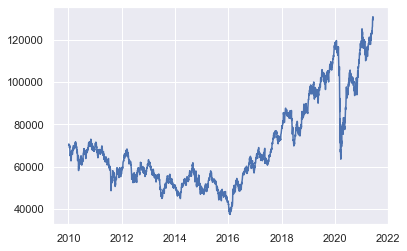

In [7]:
# Plot timeserie behavior
plt.plot(ts)

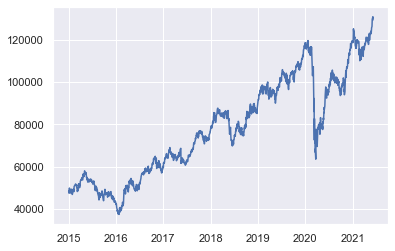

In [8]:
# Behavior above 2015
plt.plot(ts["2015":])

In [9]:
# Decomposition to study the 3 components
# Period logical 253 just because (there are study 5 days by week or 20 days by month or 253 days by year)
decomposition = seasonal_decompose(ts, period=253)

In [10]:
seasonal = decomposition.seasonal
trend = decomposition.trend
error = decomposition.resid

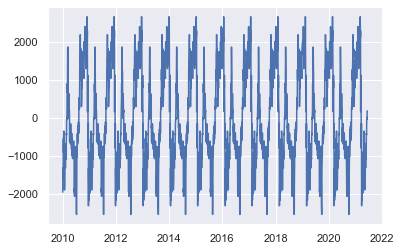

In [11]:
# Seasonal graphic
plt.plot(seasonal)

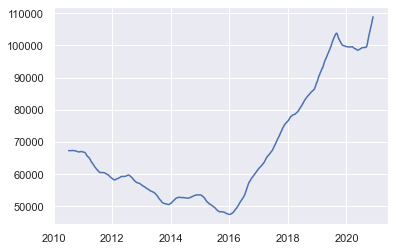

In [12]:
# Trend graphic
plt.plot(trend)

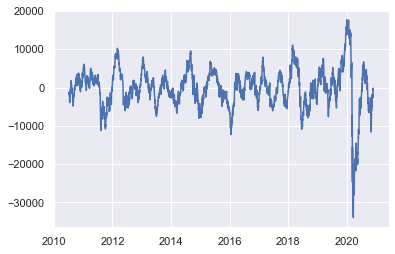

In [13]:
# Random state, often called error
plt.plot(error)

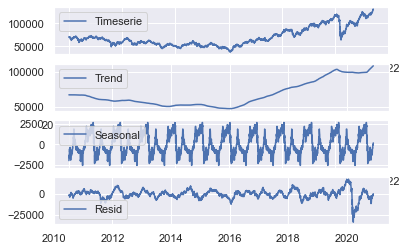

In [14]:
# All plots
plt.subplot(4, 1, 1)
plt.plot(ts, label="Timeserie")
plt.legend(loc="best")

plt.subplot(4, 1, 2)
plt.plot(trend, label="Trend")
plt.legend(loc="best")

plt.subplot(4, 1, 3)
plt.plot(seasonal, label="Seasonal")
plt.legend(loc="best")

plt.subplot(4, 1, 4)
plt.plot(error, label="Resid")
plt.legend(loc="best")

### Forecast with ARIMA algorithm

In [15]:
# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Creates and fit model ARIMA
model = ARIMA(ts, order=(2, 1, 2), freq=ts.index.inferred_freq)
fit_model = model.fit()
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 2822
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -23830.845
Method:                       css-mle   S.D. of innovations           1125.182
Date:                Tue, 08 Jun 2021   AIC                          47673.690
Time:                        15:41:51   BIC                          47709.361
Sample:                             1   HQIC                         47686.561
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            21.0276     20.041      1.049      0.294     -18.253      60.308
ar.L1.D.Close    -1.6647      0.041    -40.884      0.000      -1.744      -1.585
ar.L2.D.Close    -0.8285      0.037    -22.427      0.000      -0.901      -0.756
ma.L1.D.Close     1.5783      0.050     31.413      0.000       1.480       1.677
ma.L2.D.Close     0.7270      0.045     16.017      0.000       0.638       0.816
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0046           -0.4447j            1.0986           -0.4337
AR.2           -1.0046           +0.4447j            1.0986            0.4337
MA.1           -1.0855           -0.4441j            1.1728           -0.4382
MA.2           -1.0855           +0.4441j            1.1728            0.4382
-----------------------------------------------------------------------------
"""

In [17]:
# Predict 15 days
predict, std, conf = fit_model.forecast(15, alpha=0.05)

In [18]:
# Range of 15 days from final date
date_new_year = pd.date_range(datetime(2021, 6, 9), periods=15)

In [19]:
# States for plot chart
predict = pd.Series(predict, index=date_new_year)
lower = pd.Series(conf[:, 0], index=date_new_year)
upper = pd.Series(conf[:, 1], index=date_new_year)

In [20]:
# 5 days
predict.head()

2021-06-09    129520.649798
2021-06-10    129441.181049
2021-06-11    129433.302975
2021-06-12    129585.714382
2021-06-13    129411.979613
Freq: D, dtype: float64

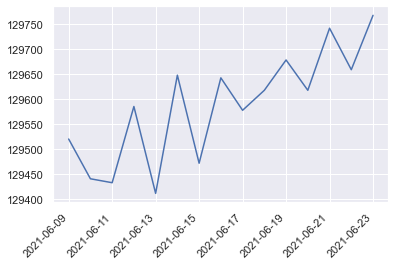

In [21]:
# Plot the forecast chart without confidence interval
fig, ax = plt.subplots()
plt.plot(predict)
plt.plot()
fig.autofmt_xdate(rotation=45)

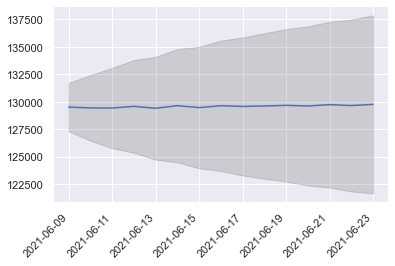

In [22]:
# Plot the forecast chart with confidence interval
fig, ax = plt.subplots()
plt.plot(predict)
plt.fill_between(lower.index, lower, upper, color='k', alpha=.15)
plt.plot()
fig.autofmt_xdate(rotation=45)

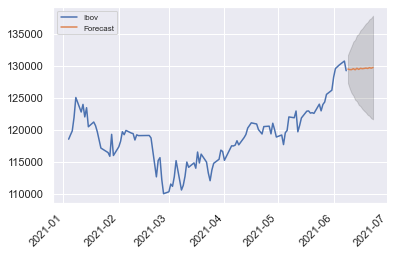

In [23]:
# Plot graphic with timeserie
fig, ax = plt.subplots()
plt.plot(ts["2021":], label="Ibov")
plt.plot(predict, label="Forecast")
plt.fill_between(lower.index, lower, upper, color='k', alpha=.15)
plt.legend(loc='upper left', fontsize=8)
fig.autofmt_xdate(rotation=45)
plt.show()

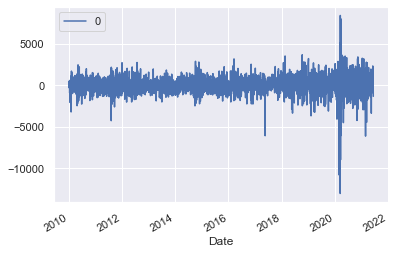

In [24]:
# Study of residuals
residuals = pd.DataFrame(fit_model.resid)
residuals.plot()
plt.show()

<AxesSubplot:ylabel='Density'>

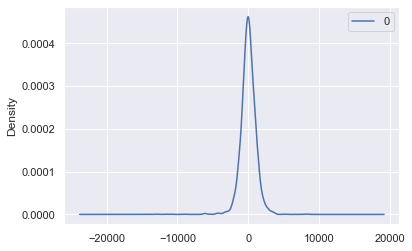

In [25]:
# The residuals distribuition
residuals.plot(kind="kde")

### New forecast test with auto arima from Pmdarima
#### Autoarima find the best configuration for forecast

In [26]:
from pmdarima.arima import auto_arima

In [33]:
auto_model = auto_arima(ts, m=4, seasonal=True, trace=False)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2823
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -23842.824
Date:                Tue, 08 Jun 2021   AIC                          47695.648
Time:                        15:49:36   BIC                          47725.374
Sample:                             0   HQIC                         47706.373
                               - 2823                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6553      0.026    -62.565      0.000      -1.707      -1.603
ar.L2         -0.8162      0.026    -31.234      0.000      -0.867      -0.765
ma.L1          1.5967      0.030     53.393      0.000       1.538       1.655
ma.L2          0.7469      0.030     25.056      0.000       0.688       0.805
sigma2      1.294e+06    1.2e+04    108.146      0.000    1.27e+06    1.32e+06
===================================================================================
Ljung-Box (L1) (Q):                   3.83   Jarque-Bera (JB):             40898.09
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               3.56   Skew:                            -1.43
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
auto_predict = auto_model.predict(n_periods=15)

In [38]:
pred_date = pd.Series(auto_predict, index=date_new_year)
pred_date.head()

2021-06-09    129418.137061
2021-06-10    129361.987381
2021-06-11    129328.164109
2021-06-12    129429.977976
2021-06-13    129289.055893
Freq: D, dtype: float64

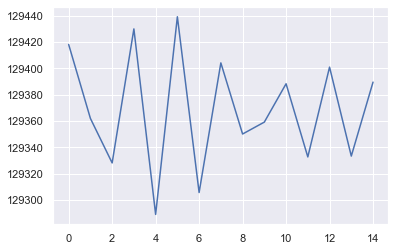

In [36]:
plt.plot(auto_predict)